<h1>Session 2 (Exercise) - Advertising Sales Data</h1>

---
*1. Implement AdaGrad and use it to fit the first advertising sales model. What do you observe when comparing it to stochastic gradient descent or the analytical solution from Statsmodels?*

In [1]:
import pandas as pd
import math 
import statsmodels.api as sm
import seaborn as sb
np.set_printoptions(precision=4)

In [2]:
df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.10,37.80,69.20,22.10
2,44.50,39.30,45.10,10.40
3,17.20,45.90,69.30,9.30
4,151.50,41.30,58.50,18.50
5,180.80,10.80,58.40,12.90


Data preparation: 
The column 'Sales' from our DataFrame define the response vector $y$ and the columns 'TV' and 'Radio' define the predictor matrix $X$. For our algorithm, we additionally need a column of ones as the column of the matrix $X$ that is associated with $b_0$.

In [3]:
y = df.Sales
X = df[['TV','Radio']].copy()
X['Ones'] = np.ones(len(df))
X.head()

,TV,Radio,Ones
1,230.10,37.80,1.00
2,44.50,39.30,1.00
3,17.20,45.90,1.00
4,151.50,41.30,1.00
5,180.80,10.80,1.00


In [4]:
y = y.values
X = X.values

Stochastic Gradient Decent


In [43]:
import random
b = np.zeros(3)
alpha = [0.00001,0.0001,0.05]
n = len(df)
for j in range(100):
    i = random.randint(0,n-1)
    grad = (y[i]-b.dot(X[i]))*-X[i]
    b = b - alpha*grad  

In [44]:
rss =  sum((y[i]-b.dot(X[i]))**2 for i in range(n))
tss = sum((y[i]-y.mean())**2 for i in range(n))
r_squared = 1.-rss/tss
mse = rss/n
mse, r_squared, b

(2.9608306783415452, 0.89068674998664021, array([ 0.0439,  0.1984,  2.5934]))

Adagrad implementation


In [7]:
b = np.zeros(3)
G = 0
n = len(df)
for j in range(10000):
    i = random.randint(0,n-1)
    grad = (y[i]-b.dot(X[i]))*-X[i]
    G = G + grad**2
    b = b - (grad/(G**0.5))

In [8]:
rss =  sum((y[i]-b.dot(X[i]))**2 for i in range(n))
tss = sum((y[i]-y.mean())**2 for i in range(n))
r_squared = 1.-rss/tss
mse = rss/n
mse, r_squared, b

(3.968064525866315, 0.85349988678578126, array([ 0.0452,  0.2277,  2.9969]))

Observations:

After repeating the AdaGrad with different number of iterations we observe that the result gets better the higher the number. However, mean squared error is pretty volatile, not depending on the number of iterations; $R^2$ fluctuates as well (way less than mean square, just decimals), and a little more than with Stochastic Gradient Descent for the same number of iterations. We could say that this is a good method for a high (10000+) number of iterations.


---
*2. Wrap stochastic gradient descent (AdaGrad) into a separate function that requires X and y as input arguments (optional: iterations, default = 10n) and returns the parameter vector b. This function should be used from now on two fit models.*

In [35]:
# Function definition is here
def adagrad( X, y, iterations='default' ):
    b = np.zeros(3)
    n=len(y)
    if iterations == 'default':
        size = 10*len(y)
    else: 
        size = iterations
    G = 0
    for j in range(size):
        i = random.randint(0,n-1)
        grad = (y[i]-b.dot(X[i]))*-X[i]
        G = G + grad**2
        b = b - (grad/(G**0.5))
        print grad
    #printing the r2 etc
    rss =  sum((y[i]-b.dot(X[i]))**2 for i in range(n))
    tss = sum((y[i]-y.mean())**2 for i in range(n))
    r_squared = 1.-rss/tss
    mse = rss/n
    print mse, r_squared, b
    return b;

In [36]:
adagrad(X, y,2)

[-2277.72   -35.34   -11.4 ]
[ 14181.2   1778.7    121. ]
167.10933395 -5.1696416939 [ 0.0127  0.0002  0.0044]


array([ 0.0127,  0.0002,  0.0044])

*3. Run gradient descent prediction of Sales = b_0 + b_1*TV and plot the prediction against the original data using Matplotlib.*

Running prediction of the model with one variable

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
Xnew = df[['TV']].copy()
y = df.Sales
reg = LinearRegression()
reg.fit(Xnew,y)
reg.score(Xnew,y)
prediction=reg.predict(Xnew)

Using our function --- The following cell might be skipped

In [26]:
Xnew = df[['TV']].copy()
y = df.Sales
y=y.values
Xnew['Ones1'] = np.ones(len(df))
Xnew['Ones2'] = np.ones(len(df))
Xnew=Xnew.values
prediction=adagrad(Xnew, y)
prediction=Xnew*prediction
prediction=np.sum(prediction,axis=1)

11.1739002435 0.587461937665 [ 0.0524  3.5103  3.5103]


Plotting the two plots

In [27]:
Xnew = df[['TV']].copy()
Xnew['Sales_Prediction'] = prediction
Xnew['Sales'] = df.Sales
Xnew.head()

,TV,Sales_Prediction,Sales
1,230.10,19.07,22.10
2,44.50,9.35,10.40
3,17.20,7.92,9.30
4,151.50,14.96,18.50
5,180.80,16.49,12.90


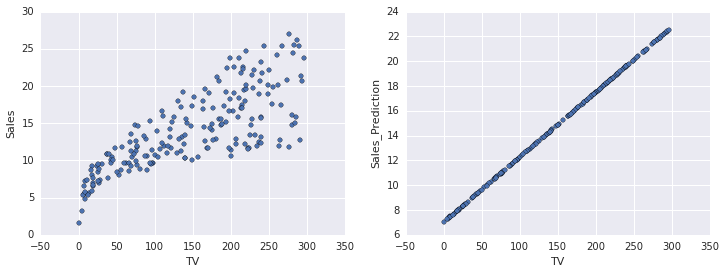

In [28]:
fix, (ax1,ax2) = plt.subplots(1,2, figsize=(12,4))
Xnew.plot(kind='scatter', x='TV', y='Sales', ax=ax1 )
Xnew.plot(kind='scatter', x='TV', y='Sales_Prediction', ax=ax2)
plt.show()

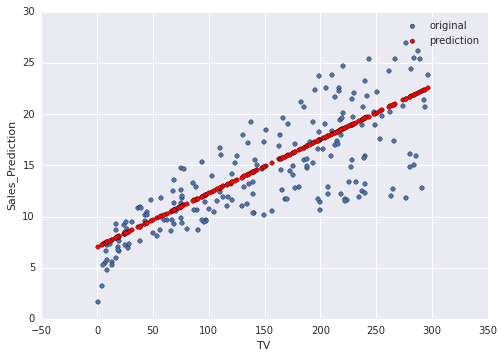

In [29]:
fix, (ax1) = plt.subplots(1)
Xnew.plot(kind='scatter', x='TV', y='Sales', ax=ax1, label='original' )
Xnew.plot(kind='scatter', x='TV', y='Sales_Prediction', ax=ax1, label='prediction', c='r')
plt.show()

*4. Use cross validation to select the right order of the polynomial. Automatically stop when the best R2 is found. What do you observe when comparing it to the solution using the AIC?*

In [17]:
Xnew = df[['TV']].copy()
Xnew = sm.add_constant(Xnew)
reg = sm.OLS(y,Xnew).fit()
print "degree: %d, "%1,"aic:",reg.aic
for degree in range(2,11):
    Xnew['TV^%d'%degree] = Xnew.TV.pow(degree)
    reg = sm.OLS(y,Xnew).fit()
    print "degree: %d, "%degree,"aic:",reg.aic

degree: 1,  aic: 1042.09132754
degree: 2,  aic: 1040.36625335
degree: 3,  aic: 1040.80381185
degree: 4,  aic: 1042.27460286
degree: 5,  aic: 1041.09265086
degree: 6,  aic: 1044.31492761
degree: 7,  aic: 1084.95306633
degree: 8,  aic: 1210.6239142
degree: 9,  aic: 1253.98282773
degree: 10,  aic: 1290.34609384


In [18]:
Xnew.head()

,const,TV,TV^2,TV^3,TV^4,TV^5,TV^6,TV^7,TV^8,TV^9,TV^10
1,1,230.10,52946.01,12182876.90,2803279974.92,645034722229.11,148422489584919.34,34152014853489940.00,7858378617788035072.00,1808212919953026711552.00,416069792881191459749888.00
2,1,44.50,1980.25,88121.12,3921390.06,174501857.78,7765332671.27,345557303871.32,15377300022273.75,684289850991182.00,30450898369107600.00
3,1,17.20,295.84,5088.45,87521.31,1505366.46,25892303.05,445347612.44,7659978933.93,131751637663.57,2266128167813.43
4,1,151.50,22952.25,3477265.88,526805780.06,79811075679.47,12091377965439.52,1831843761764086.50,277524329907259136.00,42044935980949757952.00,6369807801113888423936.00
5,1,180.80,32688.64,5910106.11,1068547185.05,193193331056.97,34929354255099.77,6315227249322039.00,1141793086677424640.00,206436190071278403584.00,37323663164887135158272.00


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold
Xnew = df[['TV']].copy()
y = df.Sales
reg = LinearRegression()
reg.fit(Xnew,y)
reg.score(Xnew,y)
rprevious=0
r=1
degree=1
while (r>rprevious):
    reg.fit(Xnew,y)
    
    avg_score = 0.
    for test,train in KFold(n, n_folds=5):
        X_test, X_train =  Xnew.values[test], Xnew.values[train] #select data using internal numpy array
        y_test, y_train =  y.iloc[test], y.iloc[train] #select data using Pandas' iloc function
        reg.fit(X_train,y_train)
        avg_score += reg.score(X_test,y_test)/5.
        
    if(degree==1):
        r=avg_score
    else:
        rprevious=r
        r=avg_score
    if(r>rprevious):
        print "degree: %d, "%degree
        print "r2 =",r
        degree=degree+1
        Xnew['TV^%d'%degree] = Xnew.TV.pow(degree)
    else:
        print "The optimum is ",degree-1,". degree of polynomial with r-square of",rprevious

    

degree: 1, 
r2 = 0.584793272798
degree: 2, 
r2 = 0.586353921345
The optimum is  2 . degree of polynomial with r-square of 0.586353921345


After observing the two solutions (AIC and Cross-Validation) we came to the conclusion that in both cases the 2. degree of polynomial was the optimum.